Tom Halloin <br> Springboard Data Science Career Track <br>

<h1 align="center">Capstone Project 2: Analysis of Berkshire Hathaway Shareholder Letters Using Natural Language Processing (NLP) Techniques</h1>

<h3 align='center'> Part 3: Exploring the Data</h3> <br>

<h4> This is a quick EDA designed to find words that might be issues later on in topic modeling. The focus will be on looking at entities that would make for good potential topics.</h4>

In [1]:
# Save for imports

import spacy
import textacy
from collections import Counter
nlp = spacy.load("en_core_web_sm")

# Wordcloud generation. Credit from https://www.datacamp.com/community/tutorials/wordcloud-python
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import matplotlib.pyplot as plt
%matplotlib inline

 <h4>Getting the letters into a dictionary.</h4>

In [18]:

doc_dict = dict()
for year in range(1977, 2020):
    file = f'../clean_letters/{year}_letter.txt'
    with open(file=file, encoding='utf-8', errors='replace') as f:
         doc_dict[str(year)] = nlp(f.read())

 <h4>Getting counts of most common entities.</h4>

In [19]:

ent_count = Counter()
org_count = Counter()
person_count = Counter()
for letter in doc_dict:
    for ent in doc_dict[letter].ents:
        ent_count[str(ent)] += 1
        if ent.label_ == 'ORG':
            org_count[str(ent)] += 1
        if ent.label_ == 'PERSON':
            person_count[str(ent)] += 1      

<h4>Bar graphs of counts of most common entities. This could technically be in a function and called three times (DRY) </h4>

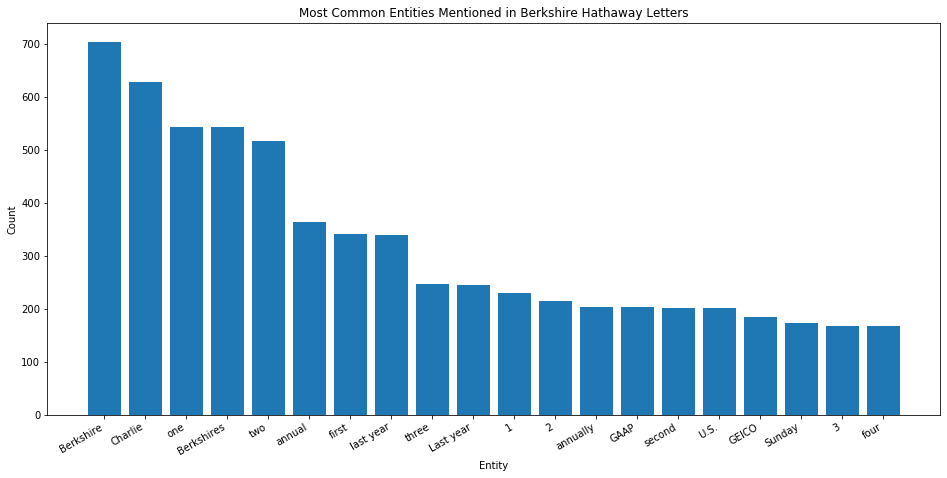

In [20]:
# Bar graph time!

top_entities = dict(ent_count.most_common(20))
f, ax = plt.subplots(figsize=(16, 8))
plt.bar(height=top_entities.values(), x=top_entities.keys())
f.autofmt_xdate()
ax.set_title('Most Common Entities Mentioned in Berkshire Hathaway Letters')
ax.set_xlabel('Entity')
ax.set_ylabel('Count')
plt.show()

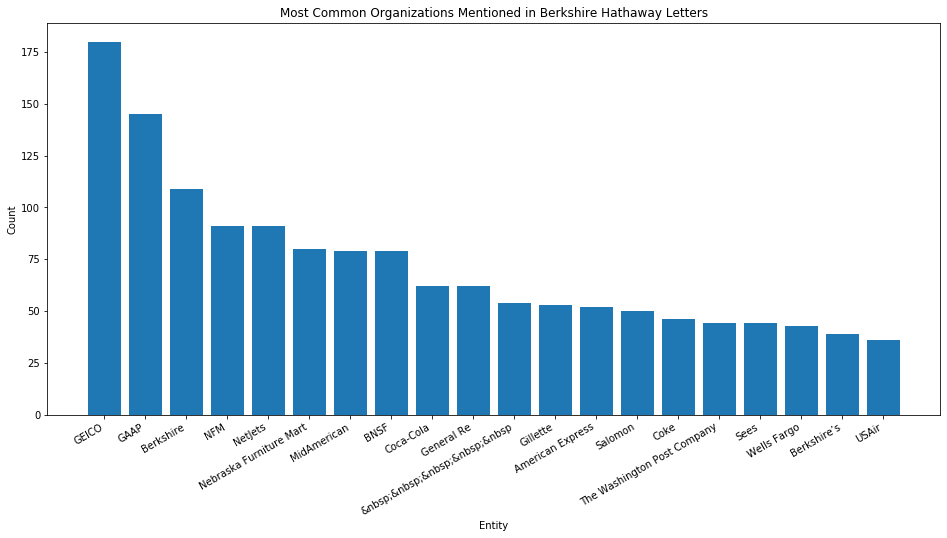

In [21]:
top_orgs = dict(org_count.most_common(20))
f, ax = plt.subplots(figsize=(16, 8))
plt.bar(height=top_orgs.values(), x=top_orgs.keys())
f.autofmt_xdate()
ax.set_title('Most Common Organizations Mentioned in Berkshire Hathaway Letters')
ax.set_xlabel('Entity')
ax.set_ylabel('Count')
plt.show()

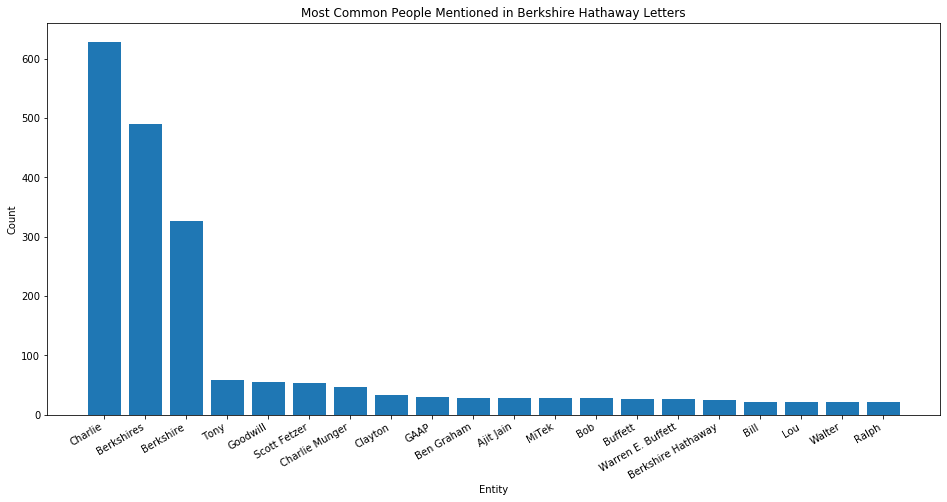

In [22]:
top_people = dict(person_count.most_common(20))
f, ax = plt.subplots(figsize=(16, 8))
plt.bar(height=top_people.values(), x=top_people.keys())
f.autofmt_xdate()
ax.set_title('Most Common People Mentioned in Berkshire Hathaway Letters')
ax.set_xlabel('Entity')
ax.set_ylabel('Count')
plt.show()

<h4>Wordcloud of the most common entities. </h4>

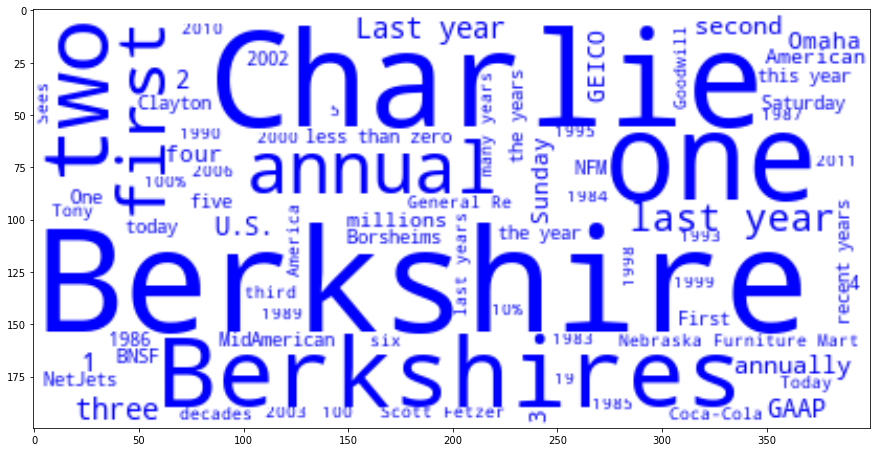

In [23]:

f, ax = plt.subplots(figsize=(15, 12))
wc = WordCloud(background_color="white", relative_scaling=0.75, color_func=lambda *args, **kwargs: (0,0,255),
               normalize_plurals=True).generate_from_frequencies(ent_count)
plt.imshow(wc, interpolation="bilinear")